In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import matplotlib.patches as mpatches



In [23]:
def load_crime_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    crimes = []
    correlation_matrix = []
    
    for i, line in enumerate(lines[1:], 1):  
        parts = line.strip().split(',')
        crime_name = parts[0].strip()
        crimes.append(crime_name)
        correlations = [float(val.strip()) for val in parts[2:]]
        correlation_matrix.append(correlations)
    
    return crimes, np.array(correlation_matrix)

In [25]:
def calculate_distance_matrix(correlation_matrix):
    return 1 - correlation_matrix


In [27]:
def apply_mds(distance_matrix):
    mds = MDS(n_components=2, 
              dissimilarity='precomputed',
              random_state=42,
              normalized_stress='auto')
    
    coordinates = mds.fit_transform(distance_matrix)
    return coordinates, mds.stress_


In [29]:
def visualize_mds(crimes, coordinates, stress):
    crime_translations = {
        "Murder": "Asesinato",
        "Rape": "Violación",
        "Robbery": "Robo con violencia",
        "Assault": "Agresión",
        "Burglary": "Robo con allanamiento",
        "Larceny": "Hurto",
        "Auto theft": "Robo de vehículos"
    }
    
    colors = {
        "Murder": "#d32f2f",      
        "Rape": "#c2185b",        
        "Robbery": "#7b1fa2",     
        "Assault": "#512da8",     
        "Burglary": "#303f9f",    
        "Larceny": "#1976d2",     
        "Auto theft": "#0288d1"   
    }
    
    plt.figure(figsize=(10, 8))
    
    for i, crime in enumerate(crimes):
        plt.scatter(coordinates[i, 0], coordinates[i, 1], 
                   color=colors[crime], s=100, edgecolor='white')
        
        plt.annotate(crime_translations[crime], 
                    (coordinates[i, 0], coordinates[i, 1]),
                    textcoords="offset points", 
                    xytext=(0, 10), 
                    ha='center',
                    fontweight='bold',
                    color=colors[crime])
    
    plt.grid(linestyle='--', alpha=0.7)
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
    
    plt.title('Escalamiento multidimensional (MDS) de delitos', fontsize=15, fontweight='bold')
    plt.xlabel('Dimensión 1', fontsize=12)
    plt.ylabel('Dimensión 2', fontsize=12)
    
    plt.annotate(f'Stress: {stress:.4f}', 
                xy=(0.02, 0.02), 
                xycoords='figure fraction',
                fontsize=10)
    
    legend_elements = [mpatches.Patch(color=colors[crime], label=crime_translations[crime]) 
                       for crime in crimes]
    plt.legend(handles=legend_elements, loc='best')
    
    plt.tight_layout()
    
    plt.savefig('mds_crimes_visualization.png', dpi=300)
    
    plt.show()

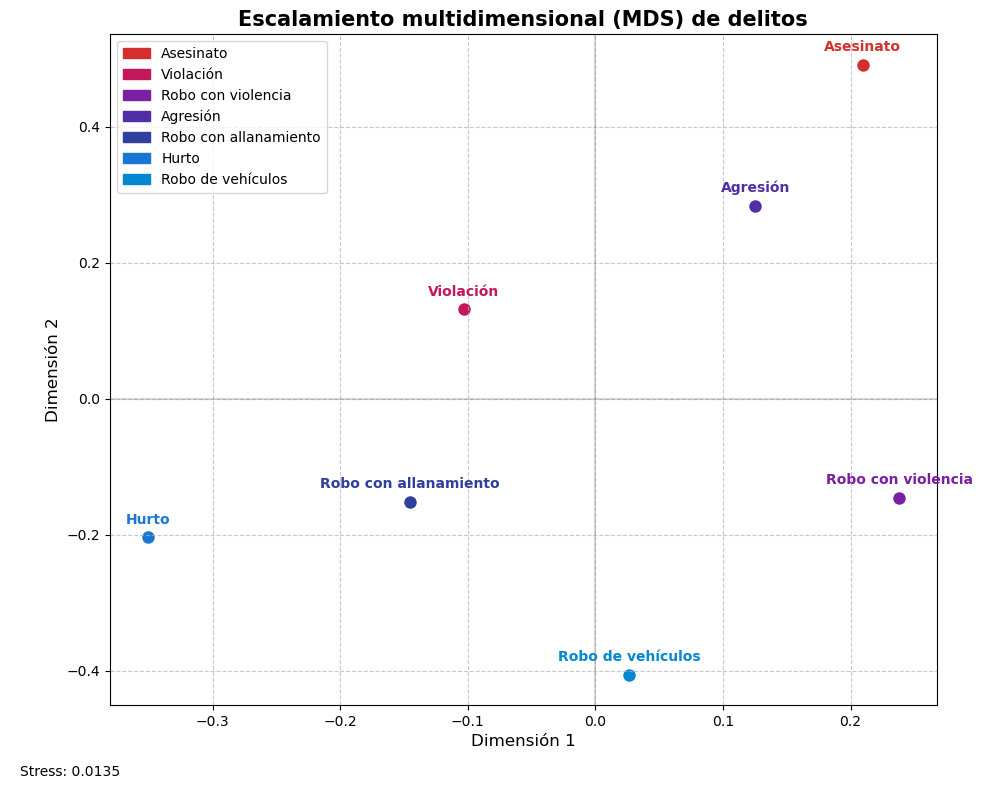

Matriz de correlación:
[[1.   0.52 0.34 0.81 0.28 0.06 0.11]
 [0.52 1.   0.55 0.7  0.68 0.6  0.44]
 [0.34 0.55 1.   0.56 0.62 0.44 0.62]
 [0.81 0.7  0.56 1.   0.52 0.32 0.33]
 [0.28 0.68 0.62 0.52 1.   0.8  0.7 ]
 [0.06 0.6  0.44 0.32 0.8  1.   0.55]
 [0.11 0.44 0.62 0.33 0.7  0.55 1.  ]]

Matriz de distancias (1 - correlación):
[[0.   0.48 0.66 0.19 0.72 0.94 0.89]
 [0.48 0.   0.45 0.3  0.32 0.4  0.56]
 [0.66 0.45 0.   0.44 0.38 0.56 0.38]
 [0.19 0.3  0.44 0.   0.48 0.68 0.67]
 [0.72 0.32 0.38 0.48 0.   0.2  0.3 ]
 [0.94 0.4  0.56 0.68 0.2  0.   0.45]
 [0.89 0.56 0.38 0.67 0.3  0.45 0.  ]]

Coordenadas MDS:
Murder: (0.2096, 0.4909)
Rape: (-0.1030, 0.1314)
Robbery: (0.2380, -0.1456)
Assault: (0.1252, 0.2835)
Burglary: (-0.1452, -0.1512)
Larceny: (-0.3509, -0.2037)
Auto theft: (0.0263, -0.4053)

Valor de stress: 0.013528


In [31]:

def main(file_path='crimes.dat'):
    crimes, correlation_matrix = load_crime_data(file_path)
    
    distance_matrix = calculate_distance_matrix(correlation_matrix)
    
    coordinates, stress = apply_mds(distance_matrix)
    
    visualize_mds(crimes, coordinates, stress)
    
    print(f"Matriz de correlación:")
    print(np.array_str(correlation_matrix, precision=2))
    
    print(f"\nMatriz de distancias (1 - correlación):")
    print(np.array_str(distance_matrix, precision=2))
    
    print(f"\nCoordenadas MDS:")
    for i, crime in enumerate(crimes):
        print(f"{crime}: ({coordinates[i, 0]:.4f}, {coordinates[i, 1]:.4f})")
    
    print(f"\nValor de stress: {stress:.6f}")

if __name__ == "__main__":
    main()